In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import random

In [27]:
(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()


train_data = train_data/train_data.max()
test_data = test_data/test_data.max()

60000

In [11]:
article_dict = {0:'T-shirt/top', 1:'Trousers', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'bag', 9:'Ankle boot'}

def show_random_image():
    rand = random.randint(0,len(train_data))

    index = rand
    plt.imshow(train_data[index], cmap = plt.cm.binary)
    plt.title(article_dict[train_labels[index]])
    plt.axis(False)
    plt.show()

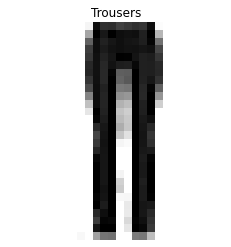

In [4]:
show_random_image()

In [5]:
train_data[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
tf.random.set_seed(42)

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(50,activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy']
              
             )

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              patience=3)

history = model.fit(train_data, train_labels,epochs = 100, validation_data = (test_data, test_labels), callbacks = [callback])

Epoch 1/100
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4100 - accuracy: 0.8536 - val_loss: 0.3323 - val_accuracy: 0.8773
Epoch 2/100
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2628 - accuracy: 0.9040 - val_loss: 0.3350 - val_accuracy: 0.8768
Epoch 3/100
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2129 - accuracy: 0.9213 - val_loss: 0.2984 - val_accuracy: 0.8893
Epoch 4/100
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1749 - accuracy: 0.9349 - val_loss: 0.3075 - val_accuracy: 0.9001
Epoch 5/100
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1466 - accuracy: 0.9464 - val_loss: 0.3220 - val_accuracy: 0.9023
Epoch 6/100
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1206 - accuracy: 0.9552 - val_loss: 0.3168 - val_accuracy: 0.9029


In [20]:
test_preds = model.predict(test_data)

In [21]:
test_preds_num = [tf.argmax(x).numpy() for x in test_preds]

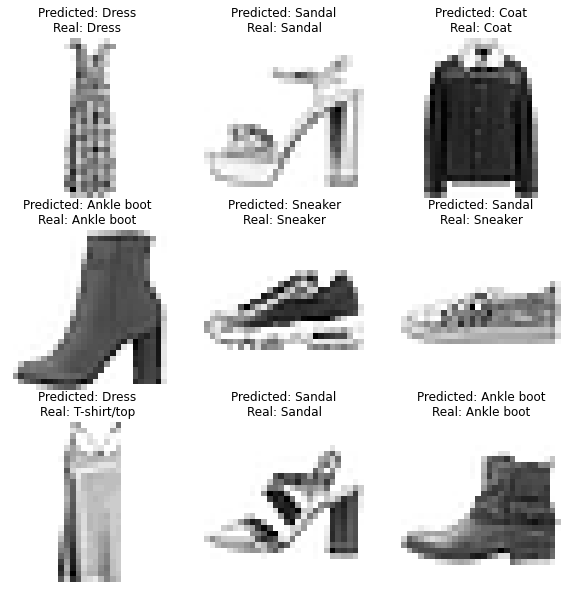

In [26]:
plt.figure(figsize = (10,10))
for i in range(9):
    
    rand = random.randint(0,len(test_preds))
    
    
    ax = plt.subplot(3,3,i+1)

    index = rand
    plt.axis(False)

    plt.imshow(test_data[index], cmap = plt.cm.binary)
    plt.title(f"Predicted: {article_dict[tf.argmax(test_preds[index]).numpy()]}\nReal: {article_dict[test_labels[index]]}")


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels,test_preds_num)

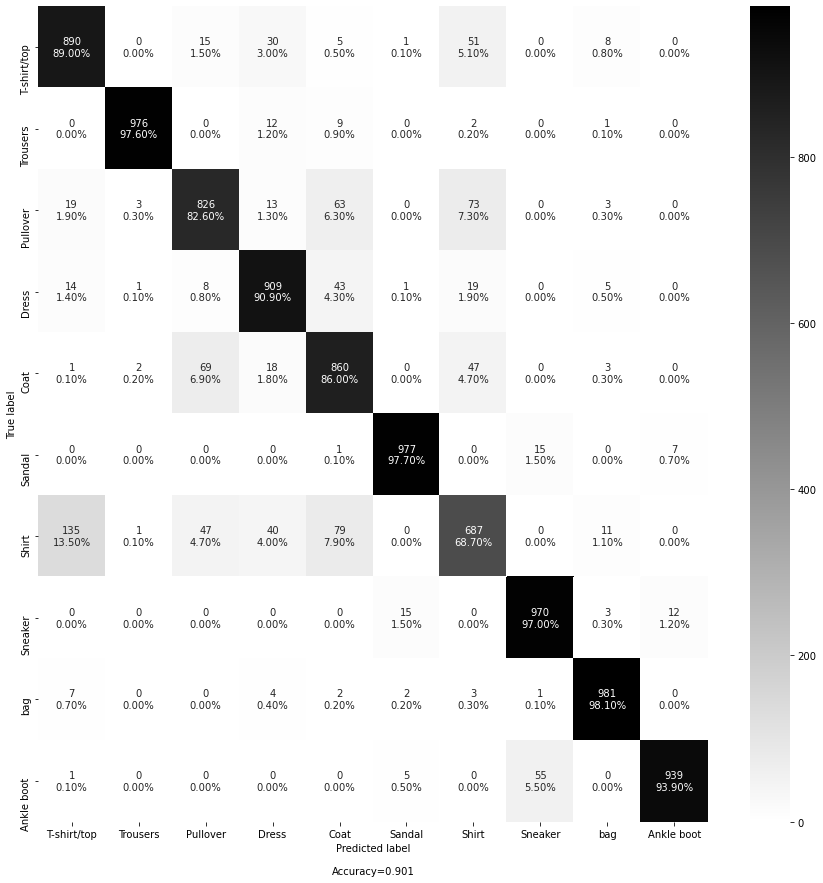

In [24]:
import seaborn as sns

categories = article_dict.values()
make_confusion_matrix(cm, 
                      categories=categories, 
                      cmap= 'binary',
                      figsize = (15,15))

plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value*10) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)